# Magnetic Field Shaping via Helmholtz Coils

In [3]:
import numpy as np
import magpylib as magpy
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

### Create a pair of coils in the anti-Helmholtz configuration along the x-axis and y-axis.

In [4]:
# Helmholtz coil pair along the x-axis and the y-axis.
# diam [mm]
# position [mm]
# current [A]

def coil_pair_x(winds, dist, diam, curr, width, anti):
    for x in np.linspace(-winds*width/2, winds*width/2, winds):
        w1 = magpy.current.Loop(
            current=curr,
            diameter=diam,
            position=(dist,0,0),
            orientation= R.from_euler('y', 90, degrees=True)
        )

    for x in np.linspace(-winds*width/2, winds*width/2, winds):
        w2 = magpy.current.Loop(
            current=anti*curr,
            diameter=diam,
            position=(-dist,0,0),
            orientation= R.from_euler('y', 90, degrees=True)
        )

    return w1, w2

def coil_pair_y(winds, dist, diam, curr, width, anti):
    for y in np.linspace(-winds*width/2, winds*width/2, winds):
        w1 = magpy.current.Loop(
            current=curr,
            diameter=diam,
            position=(0,dist,0),
            orientation= R.from_euler('x', 90, degrees=True)
        )

    for y in np.linspace(-winds*width/2, winds*width/2, winds):
        w2 = magpy.current.Loop(
            current=anti*curr,
            diameter=diam,
            position=(0,-dist,0),
            orientation= R.from_euler('x', 90, degrees=True)
        )

    return w1, w2

### Create two pairs of coils for 2D MOT magnetic field.

In [26]:
def makeQuadCoil(winds, dist, diam, curr, width, anti):
    quad = magpy.Collection()
    w1, w2 = coil_pair_x(winds, dist, diam, curr, width, anti)
    quad.add(w1)
    quad.add(w2)
    w3, w4 = coil_pair_y(winds, dist, diam, curr, width, anti)
    quad.add(w3)
    quad.add(w4)
    return quad

### Streamplots + Heatmap for B-field

In [18]:
def plot_mag_field_xy(coil1):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 20)
    grid = np.array([[(x,y,0) for x in ts] for y in ts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,1], Bamp,
        levels=100,
        cmap='coolwarm',
    )
    axs.streamplot(
        grid[:,:,0], grid[:,:,1], B[:,:,0], B[:,:,1],
        density=2,
        color='black',
    )
    axs.set(
        title='Magnetic field of coil',
        xlabel='x-position [mm]',
        ylabel='y-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G]')
    plt.tight_layout()
    plt.show()

def plot_mag_field_xz(coil1, y=0):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 20)
    zts = np.linspace(-50, 50, 100)
    grid = np.array([[(x,y,z) for x in ts] for z in zts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,2], Bamp,
        levels=100,
        cmap='coolwarm',
    )
    axs.streamplot(
        grid[:,:,0], grid[:,:,2], B[:,:,0], B[:,:,2],
        density=2,
        color='black',
    )
    axs.set(
        title='Magnetic field of coil',
        xlabel='x-position [mm]',
        ylabel='z-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G]')
    plt.tight_layout()
    plt.show()

### Heatmap of B-field magnitude

In [ ]:
def plot_mag_amp_line(coil1,z):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    ts = np.linspace(-20, 20, 40)
    grid = np.array([(x,0,z) for x in ts])
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=1) * 10 # in Gauss
    axs.plot(grid[:,0],Bamp)
    axs.set(
        title='Magnetic field of coil',
        xlabel='x-position [mm]',
        ylabel='B_x amplitude [G]',
    )
    plt.tight_layout()
    plt.show()
    
def plot_amp_xz(coil1, y):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 40)
    zts = np.linspace(-50, 50, 100)
    grid = np.array([[(x,y,z) for x in ts] for z in zts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2)
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,2], Bamp * 10,
        levels=100,
        cmap='coolwarm',
    )
    axs.set(
        title='Magnetic Field Amplitude, y = '+str(y),
        xlabel='x-position [mm]',
        ylabel='z-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='G')
    plt.tight_layout()
    plt.show()
    
def plot_amp_yz(coil1, x):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 40)
    zts = np.linspace(-50, 50, 100)
    grid = np.array([[(x,y,z) for y in ts] for z in zts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) # mT
    
    cp = axs.contourf(
        grid[:,:,1], grid[:,:,2], Bamp * 10,
        levels=100,
        cmap='coolwarm',
    )
    axs.set(
        title='Magnetic Field Amplitude, x = '+str(x),
        xlabel='y-position [mm]',
        ylabel='z-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='G')
    plt.tight_layout()
    plt.show()
    
    
def plot_amp_xy(coil1, z):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 40)
    grid = np.array([[(x,y,z) for x in ts] for y in ts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) # mT
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,1], Bamp * 10,
        levels=100,
        cmap='coolwarm',
    )
    axs.set(
        title='Magnetic Field Amplitude, z = '+str(z),
        xlabel='x-position [mm]',
        ylabel='y-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='G')
    plt.tight_layout()
    plt.show()

### Heatmap of B-field gradient

In [24]:
def plot_grad_xy(coil1, z):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 40)
    grid = np.array([[(x,y,z) for x in ts] for y in ts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10 # G
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,1], np.linalg.norm(np.gradient(Bamp),axis=0) * 10,
        levels=100,
        cmap='coolwarm',
    )
    axs.set(
        title='Magnetic Field Gradient',
        xlabel='x-position [mm]',
        ylabel='y-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G/cm]')
    plt.tight_layout()
    plt.show()

# Make the B-field

Collection nolabel (id=140438601352592)
├── Loop nolabel (id=140438601354768)
├── Loop nolabel (id=140438601353552)
├── Loop nolabel (id=140438601351248)
└── Loop nolabel (id=140438600890512)


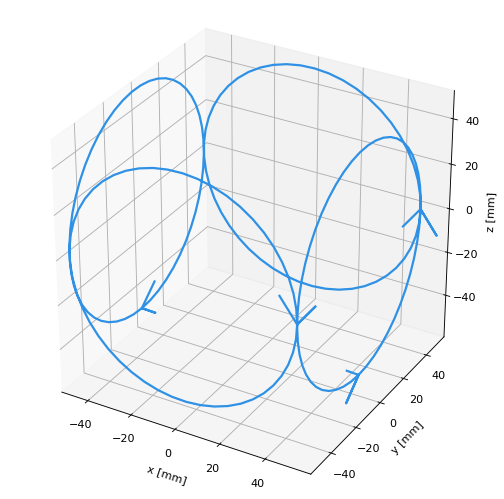

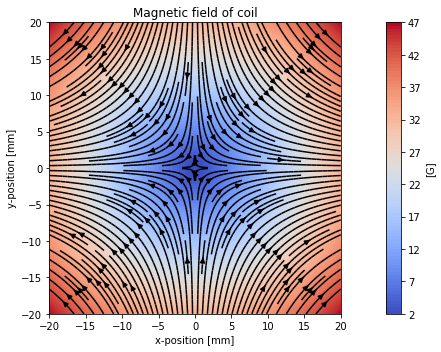

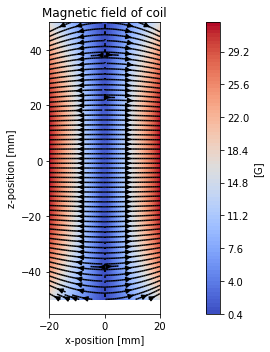

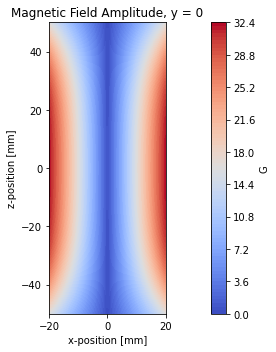

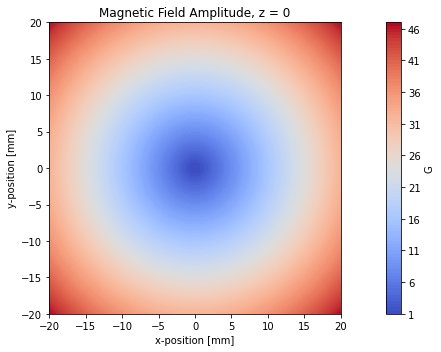

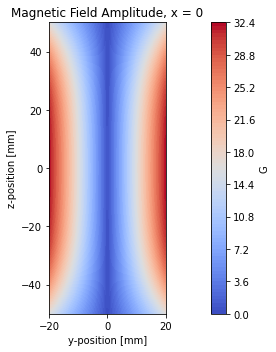

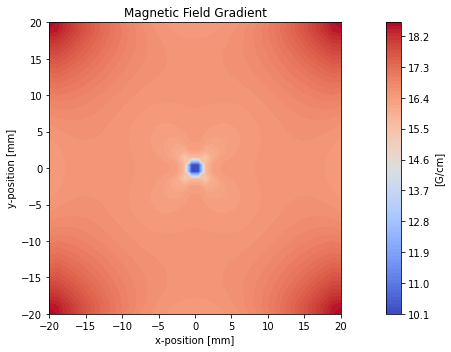

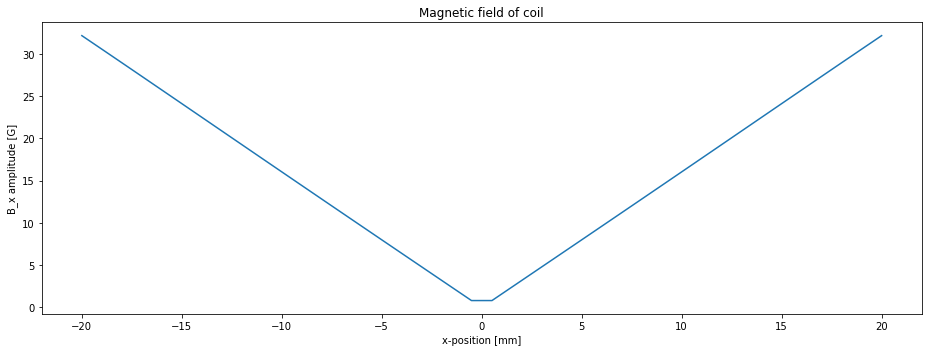

In [27]:
quadcoil = makeQuadCoil(winds = 10, dist = 50, diam = 100, curr = 400, width = 1, anti = -1)

quadcoil.describe()

quadcoil.show()


# Stream plot
plot_mag_field_xy(quadcoil)
plot_mag_field_xz(quadcoil, y = 0)

# xz plane,
plot_amp_xz(quadcoil, y=0)

# xy plane, z=z
plot_amp_xy(quadcoil, z=0)

# yz plane, z=z
plot_amp_yz(quadcoil, x=0)

# Gradient in xy plane
plot_grad_xy(quadcoil, z=0)

# amplitude
plot_mag_amp_line(quadcoil, z=0)